In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import  svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
import inspect
import dask.dataframe as dd
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv("films.csv")
df

,web-scraper-order,web-scraper-start-url,Film_name,Popularity_rank,IMDbscore,Metascore,Votes,Certificate,Run_time,Genre
0,1557261010-11301,https://www.imdb.com/search/title?title_type=f...,Avengers: Infinity War,1,8.5,68.0,647469.0,PG-12,149 min,"Action, Adventure, Sci-Fi"
1,1557261010-11302,https://www.imdb.com/search/title?title_type=f...,Aquaman,2,7.1,55.0,246474.0,PG-12,143 min,"Action, Adventure, Fantasy"
2,1557261010-11303,https://www.imdb.com/search/title?title_type=f...,Arctic,3,6.9,71.0,13690.0,PG-13,98 min,"Adventure, Drama"
3,1557261010-11304,https://www.imdb.com/search/title?title_type=f...,Spider-Man: Into the Spider-Verse,4,8.5,87.0,193017.0,GP,117 min,"Animation, Action, Adventure"
4,1557261010-11305,https://www.imdb.com/search/title?title_type=f...,Ant-Man and the Wasp,5,7.1,70.0,232696.0,GP,118 min,"Action, Adventure, Comedy"
5,1557261010-11306,https://www.imdb.com/search/title?title_type=f...,Black Panther,6,7.3,88.0,503847.0,PG-12,134 min,"Action, Adventure, Sci-Fi"
6,1557261010-11307,https://www.imdb.com/search/title?title_type=f...,High Life,7,6.0,75.0,7267.0,R,113 min,"Adventure, Drama, Mystery"
7,1557261010-11308,https://www.imdb.com/search/title?title_type=f...,Ophelia,8,6.9,65.0,463.0,PG-13,114 min,"Drama, Romance"
8,1557261010-11309,https://www.imdb.com/search/title?title_type=f...,BlacKkKlansman,9,7.5,83.0,140368.0,R,135 min,"Biography, Crime, Drama"
9,1557261010-11310,https://www.imdb.com/search/title?title_type=f...,Dragged Across Concrete,10,7.1,60.0,12847.0,R,159 min,"Action, Crime, Drama"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
web-scraper-order        5000 non-null object
web-scraper-start-url    5000 non-null object
Film_name                5000 non-null object
Popularity_rank          5000 non-null int64
IMDbscore                4459 non-null float64
Metascore                563 non-null float64
Votes                    4459 non-null float64
Certificate              1367 non-null object
Run_time                 4284 non-null object
Genre                    4989 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 390.7+ KB


In [36]:
df["IMDbscore"].fillna(df["IMDbscore"].median(), inplace=True)
df["Votes"].fillna(df["Votes"].median(), inplace=True)

Text(0.5, 1.0, 'The scatterplot of IMDb score')

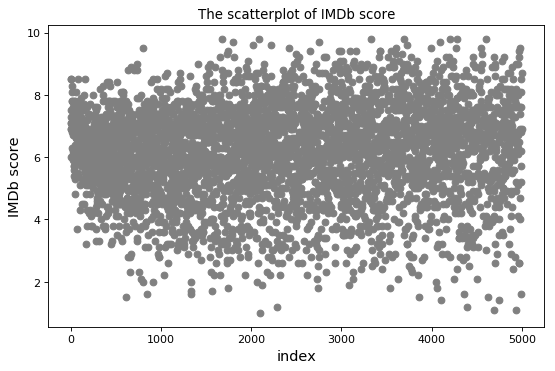

In [5]:
fig,ax = plt.subplots (figsize = (8,5) , dpi = 80)
ax.scatter (df.index,df["IMDbscore"],color='0.5')
ax.set_xlabel("index",fontsize=13)
ax.set_ylabel("IMDb score",fontsize=13)
ax.set_title("The scatterplot of IMDb score")

Text(0.5, 1.0, 'The Votes distribution')

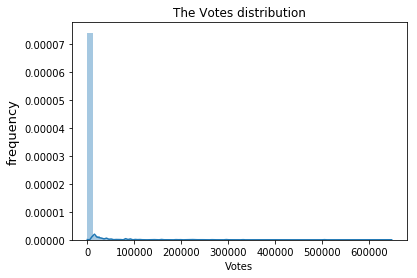

In [42]:
distplot = sns.distplot(df['Votes'])
distplot.set_ylabel("frequency",fontsize=13)
distplot.set_title("The Votes distribution")

Text(0.5, 1.0, 'The Votes distribution after transformation')

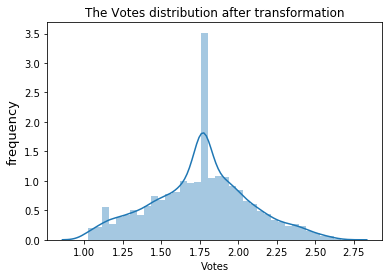

In [47]:
df['Votes'] = np.log1p(df['Votes'])
distplot = sns.distplot(df['Votes'])
distplot.set_ylabel("frequency",fontsize=13)
distplot.set_title("The Votes distribution after transformation")